In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\Tharun reddy\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
# replacing blanks with 0 as total tenure is 0 and NO charges are recorded
# converted TotalCharges datatype from object to float

df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

In [14]:
# converted 0 and 1 values of senior citizens to yes/no to make it easy to understand

In [15]:
def conv(value):
    if value == 1 :
         return "Yes"
    else:
        return "No"

    df['SeniorCitizen'] =  df["SeniorCitizen"].apply(conv)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# from the given chart we can conclude  that 26.54 % of our customers has churned out 

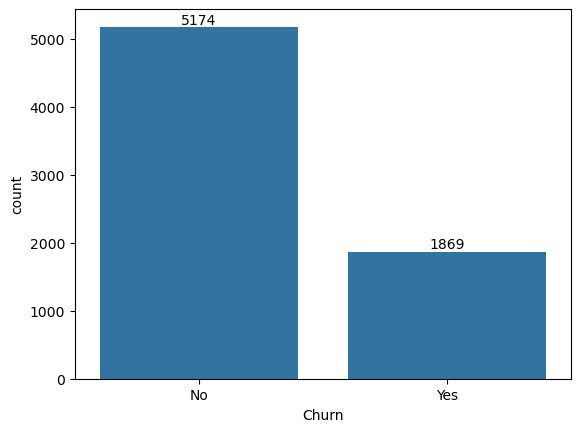

In [18]:
 ax = sns.countplot(data = df , x = "Churn")
 for x in ax.containers:
     ax.bar_label(x)
     plt.show()

In [30]:
# there is no relation with churn rate based on gender , both male and female churned out at same rate.

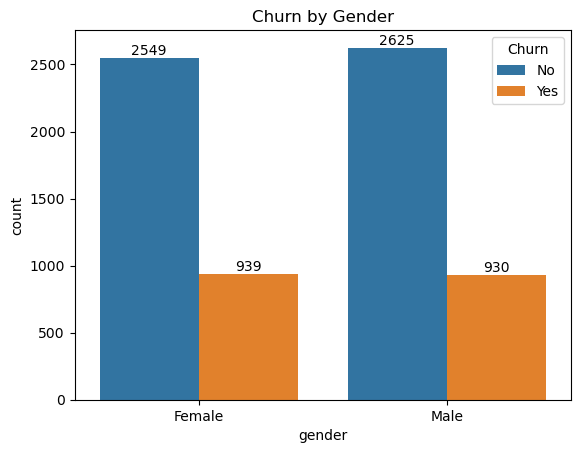

In [32]:
ax = sns.countplot(data=df, x="gender", hue="Churn")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Churn by Gender")
plt.show()

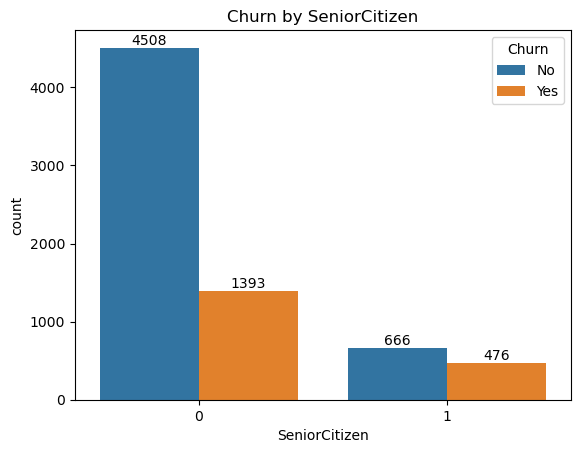

In [33]:
ax = sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Churn by SeniorCitizen")
plt.show()

In [ ]:
# comparative a larger number of customers in senior citizens has churned out than customers who are not seniorcitizen

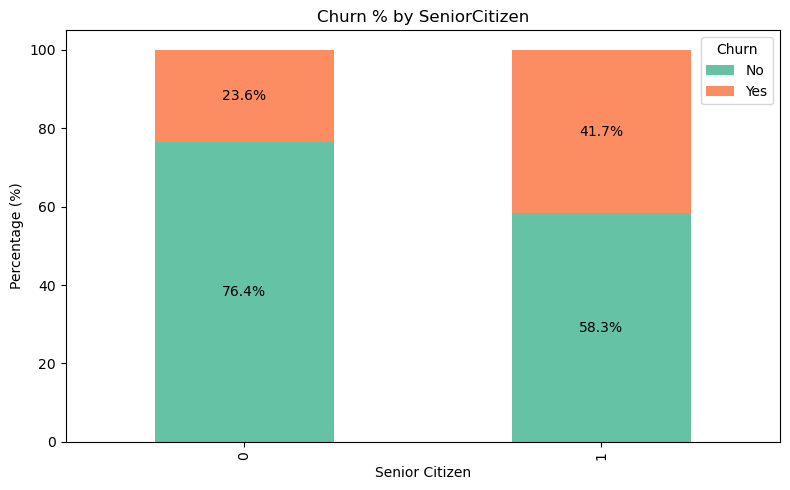

In [34]:
# Calculate percentage table
pct = (
    df.groupby("SeniorCitizen")["Churn"]
      .value_counts(normalize=True)
      .rename("pct")
      .mul(100)
      .reset_index()
)
pivot = pct.pivot(index="SeniorCitizen", columns="Churn", values="pct")
pivot.fillna(0, inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")   # Seaborn color theme

ax = pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=colors
)

# Add % labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn % by SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


In [44]:
# customers who have  used our servives for long tenure has stayed and customers and customers who has used less than 6 mmonths has churned out in 
#large number

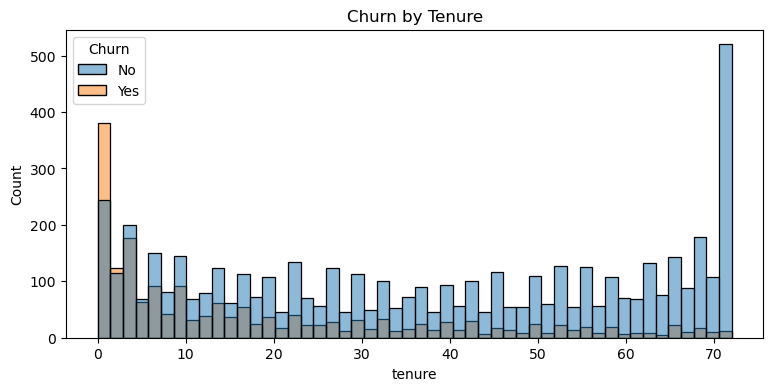

In [43]:
plt.figure(figsize=(9,4))
sns.histplot(data = df , x = "tenure", hue= "Churn", bins= 50)
plt.title("Churn by Tenure")
plt.show()

In [ ]:
# customers who have month to month more likely to churn out than those who have one or two year contract 

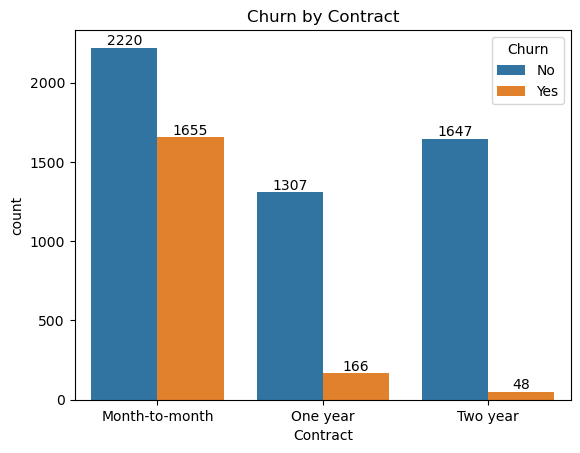

In [31]:
 ax = sns.countplot(data = df , x = "Contract", hue= "Churn")
 for x in ax.containers:
     ax.bar_label(x)
plt.title("Churn by Contract") 
plt.show()

In [46]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Customers with internet services—especially Fiber Optic—show much higher churn than those without internet.
#Churn spikes among users who lack security, backup, device protection, or tech support, indicating unmet service expectations.
#Entertainment services like StreamingTV/Movies don’t reduce churn; in fact, users who have them churn more.
#Overall, churn is driven by the quality and value of digital services, not basic phone service availability.

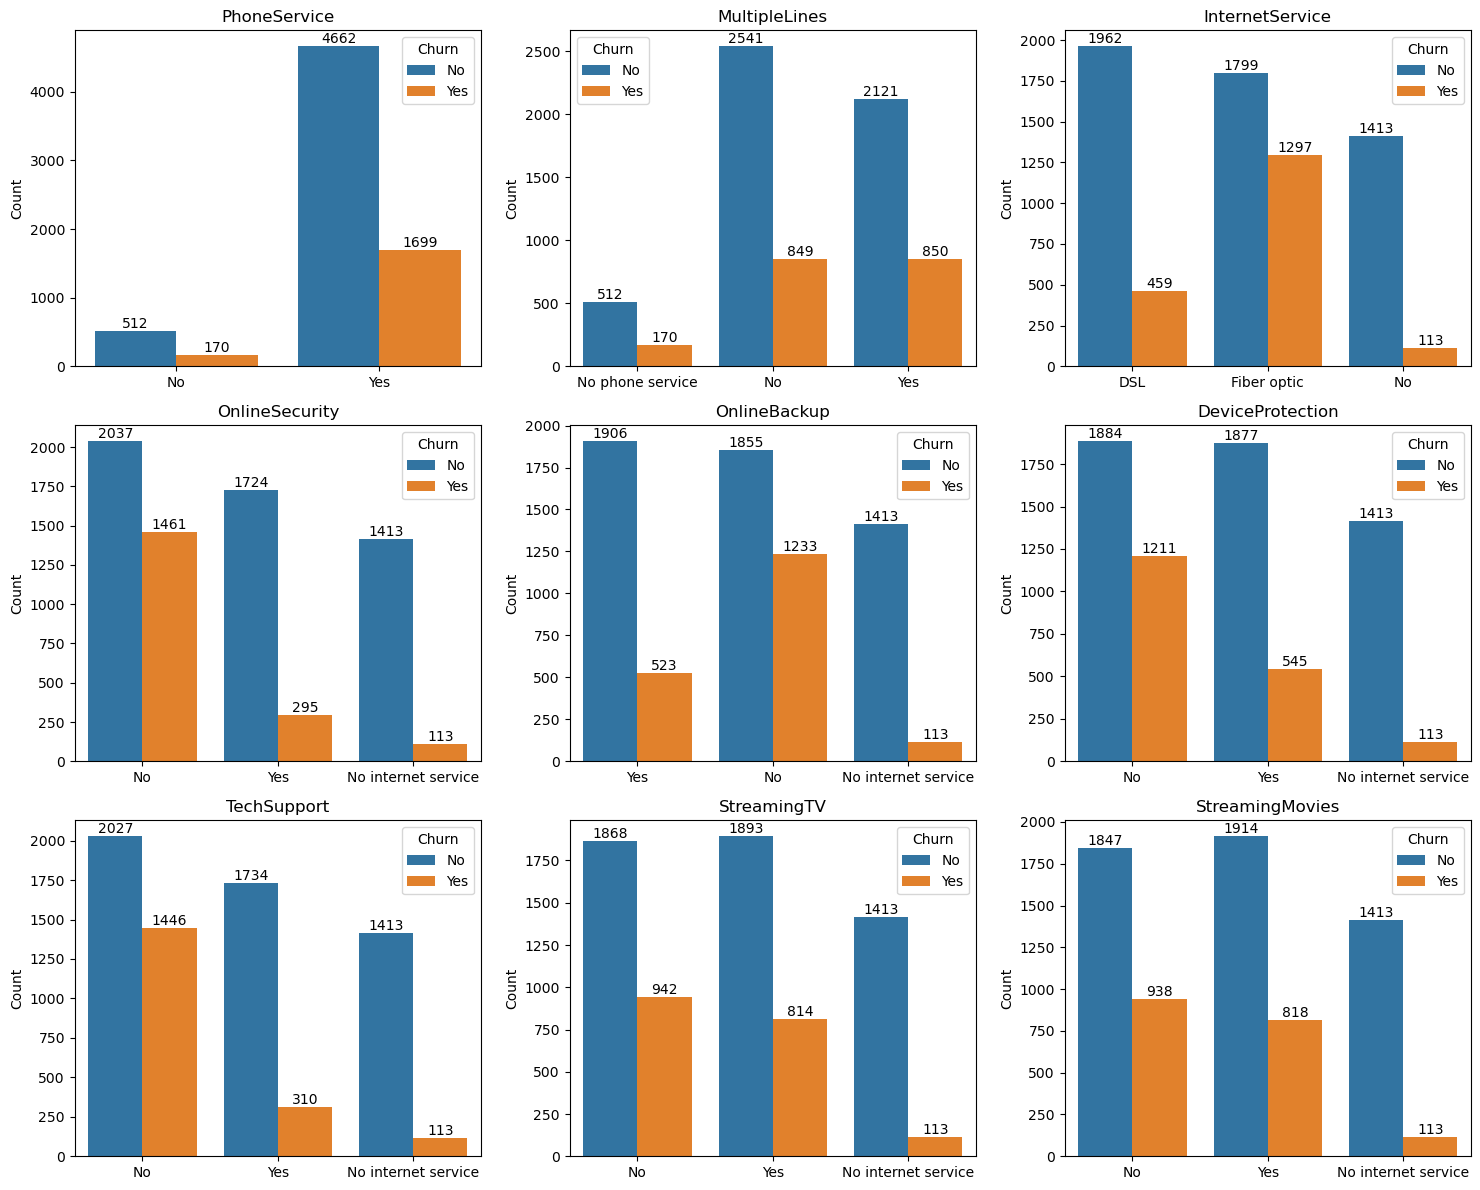

In [47]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(data=df, x=col, hue="Churn")
    plt.title(col)
    plt.xlabel("")  # cleaner look
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    
    # Add labels on bars
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()



In [ ]:
# Customers who are doing payment by electronic check are more likely to churn out than payment methods

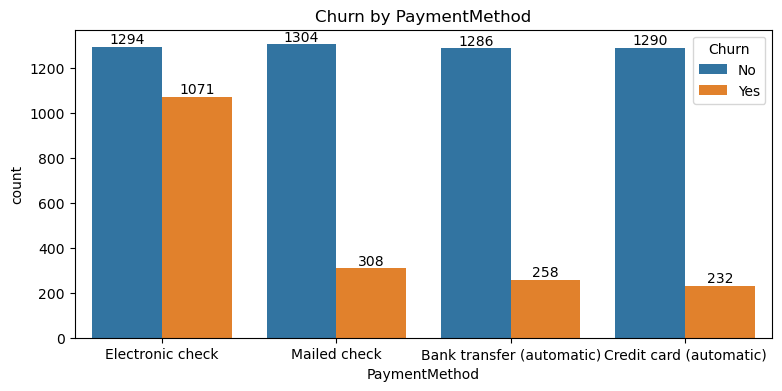

In [51]:

plt.figure(figsize=(9,4))
ax = sns.countplot(data = df , x = "PaymentMethod", hue= "Churn")
for x in ax.containers:
     ax.bar_label(x)
plt.title("Churn by PaymentMethod") 
plt.show()

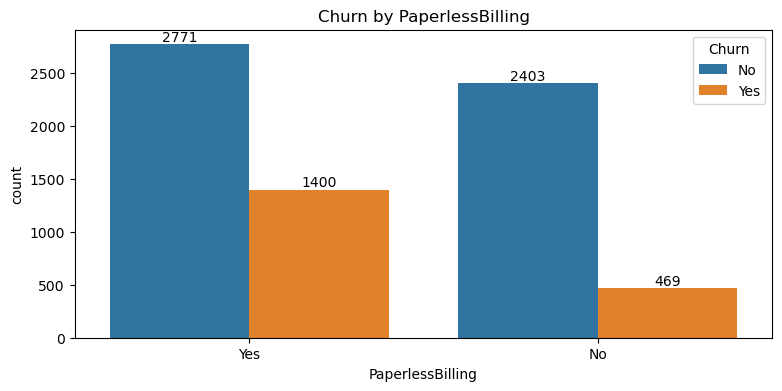

In [52]:

plt.figure(figsize=(9,4))
ax = sns.countplot(data = df , x = "PaperlessBilling", hue= "Churn")
for x in ax.containers:
     ax.bar_label(x)
plt.title("Churn by PaperlessBilling") 
plt.show()